<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>





## Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.


## Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)





\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}

In [90]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [208]:
x=0.5

def exponencial(x, N=100):
  serie=0

  for n in range(0,N):
    exp_= (-1)**n*x**n/math.factorial(n)
    serie=serie+exp_

  return serie

In [3]:
epsilon= 1e-7

# Comparación para estimar el N que cumple la condición
N=0
while abs(((-x)**(N + 1)) / math.factorial(N + 1)) >= abs(epsilon* exponencial(x, N)):
    N += 1

In [4]:
aprox = exponencial(x, N)
v_teorico= np.exp(-x)

print(f"Aproximación : {aprox}")
print(f"Valor teórico : {v_teorico}")
print(f"Número de términos: {N}") # Desde N=8 se cumple la condición

Aproximación : 0.6065305679563492
Valor teórico : 0.6065306597126334
Número de términos: 8


In [62]:
x= 9.8
n= 10

for i in range(n + 1):
    termino = ((-1) ** i) * (x ** i) / math.factorial(i)
    print(f"Termino {i}: {termino}") # Los números cambian de signo como se espera de la serie alternante pero unos son más grandes que otros

Termino 0: 1.0
Termino 1: -9.8
Termino 2: 48.02000000000001
Termino 3: -156.86533333333338
Termino 4: 384.32006666666683
Termino 5: -753.267330666667
Termino 6: 1230.3366400888895
Termino 7: -1722.4712961244452
Termino 8: 2110.0273377524454
Termino 9: -2297.585323330441
Termino 10: 2251.6336168638322


In [91]:
# Precisión para valores grandes x

x_valores= [9.8, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for x in x_valores:
    N = 0
    ep= 1e-7
    while abs(((-x)**(N + 1)) / math.factorial(N + 1)) >= abs(ep* exponencial(x, N)):
        N += 1

    aprox = 1/exponencial(-x,N) # para ver si hay mayor precisión
    valor_exacto = np.exp(-x)
    print(f"x = {x}, Aproximación: {aprox}, Valor Exacto: {valor_exacto}, N: {N}")

# Aparentemente hay mejor precisión con 1/exponencial(-x,N)

x = 9.8, Aproximación: 5.5451599432177e-05, Valor Exacto: 5.5451599432176945e-05, N: 44
x = 20, Aproximación: 2.0611536224385583e-09, Valor Exacto: 2.061153622438558e-09, N: 82
x = 30, Aproximación: 9.357622968840171e-14, Valor Exacto: 9.357622968840175e-14, N: 101
x = 40, Aproximación: 4.24835425529159e-18, Valor Exacto: 4.248354255291589e-18, N: 122
x = 50, Aproximación: 1.9287498479639164e-22, Valor Exacto: 1.9287498479639178e-22, N: 139
x = 60, Aproximación: 8.75651076269652e-27, Valor Exacto: 8.75651076269652e-27, N: 154
x = 70, Aproximación: 3.975449735908648e-31, Valor Exacto: 3.975449735908647e-31, N: 171
x = 80, Aproximación: 1.8048513878454156e-35, Valor Exacto: 1.8048513878454153e-35, N: 186
x = 90, Aproximación: 8.194012623990511e-40, Valor Exacto: 8.194012623990515e-40, N: 203
x = 100, Aproximación: 3.7200759760208356e-44, Valor Exacto: 3.720075976020836e-44, N: 217


By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

In [219]:
# Incrementando progresivamente desde el 1 al 10

e = 1e-7
valores_x = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

for x in valores_x:
    N = 0
    termino_anterior = 1
    convergencia = True

    while True:
        termino = ((-x) ** (N + 1)) / math.factorial(N + 1)
        if abs(termino) <= abs(e * termino_anterior):
            convergencia = False
            break
        termino_anterior = termino
        N += 1

    aproximacion = exponencial(x, N)
    valor_exacto = np.exp(-x)

    print(f"x = {x}, Aproximación: {aproximacion}, Valor Exacto: {valor_exacto}, N: {N}, Convergencia: {convergencia}")

# Entre más grande x, se ve que es menos probable que converga a cierto valor en específico

x = 1, Aproximación: 0.36787944117144245, Valor Exacto: 0.36787944117144233, N: 177, Convergencia: False
x = 10, Aproximación: 4.5399929433607724e-05, Valor Exacto: 4.5399929762484854e-05, N: 306, Convergencia: False
x = 20, Aproximación: 5.47810291652921e-10, Valor Exacto: 2.061153622438558e-09, N: 380, Convergencia: False
x = 30, Aproximación: -8.553016433669241e-05, Valor Exacto: 9.357622968840175e-14, N: 439, Convergencia: False
x = 40, Aproximación: 0.1470264494805502, Valor Exacto: 4.248354255291589e-18, N: 491, Convergencia: False
x = 50, Aproximación: -7015.776232597128, Valor Exacto: 1.9287498479639178e-22, N: 538, Convergencia: False
x = 60, Aproximación: -1223051118.0619795, Valor Exacto: 8.75651076269652e-27, N: 582, Convergencia: False
x = 70, Aproximación: 15141759713408.848, Valor Exacto: 3.975449735908647e-31, N: 623, Convergencia: False
x = 80, Aproximación: 6.772465846238849e+17, Valor Exacto: 1.8048513878454153e-35, N: 663, Convergencia: False
x = 90, Aproximación: -

In [246]:
def error(x, N):
    valor_exacto = math.exp(-x)
    ap = exponencial(x, N)
    error = abs(valor_exacto - ap)/abs(valor_exacto)
    return error
print(error(x,N))

1.3967334149491155e+35


In [247]:
x_pruebas = [1, 5, 12, 20, 60]
N_values = list(range(1, 101))

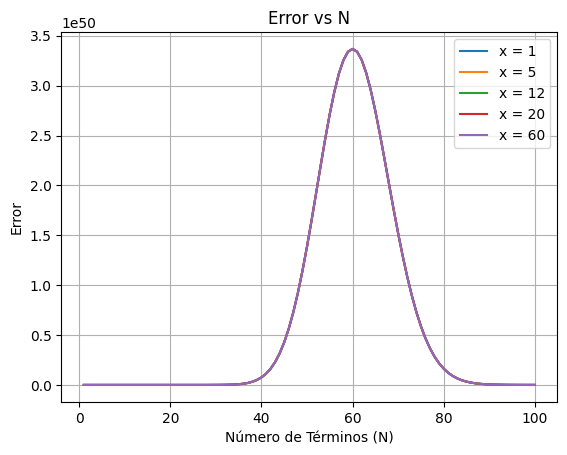

In [249]:
errores_x=[]

for i in x_pruebas:
    errores = [error(x, N) for N in N_values]
    errores_x.append(errores)

for i, x in enumerate(x_pruebas):
    plt.plot(N_values, errores_x[i], label=f'x = {x}')

plt.xlabel("Número de Términos (N)")
plt.ylabel("Error")
plt.title("Error vs N")
plt.legend()
plt.grid()

# **Cancelación sustractiva**